# Predicting Points Per Game for an NBA Team 


This notebook demonstrates the process of building a predictive model to suggest how many points per game an NBA team would have (in this case we will take a look at the Sacramento Kings).
All the processes involved, such as data wrangling, feature engineering, exploratory data analysis, inferential statistics and machine learning have been divided into main sections.

This is a **Supervised Regression** Machine Learning Problem we are solving.

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

sns.set_style("whitegrid")

%matplotlib inline

In Data Wrangling we need to load all the data available that is important to us such as Points, Assists, Wins, FG%, etc.
Then we would take a look at the correlation of the data between each other. 

The first step is to load all the data available to us in a Pandas Dataframe and extract basic information such as number of samples, number of null values rows, number of features, etc. 

The next step would be to deal with the missing values using a suitable method (dropping, interpolating, etc.) and convert certain features into a more suitable form for applying inferential statistics and machine learning algorithms.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-games/games.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/games_details.csv


# Data Wrangling

In the first section of the notebook, I will attempt at cleaning the NBA Dataset and wrangling into a form that is suitable for further analysis.
he entire data wrangling process will be done using the Python Pandas library.

In [3]:
games = pd.read_csv("/kaggle/input/nba-games/games.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23195 non-null  object 
 1   GAME_ID           23195 non-null  int64  
 2   GAME_STATUS_TEXT  23195 non-null  object 
 3   HOME_TEAM_ID      23195 non-null  int64  
 4   VISITOR_TEAM_ID   23195 non-null  int64  
 5   SEASON            23195 non-null  int64  
 6   TEAM_ID_home      23195 non-null  int64  
 7   PTS_home          23096 non-null  float64
 8   FG_PCT_home       23096 non-null  float64
 9   FT_PCT_home       23096 non-null  float64
 10  FG3_PCT_home      23096 non-null  float64
 11  AST_home          23096 non-null  float64
 12  REB_home          23096 non-null  float64
 13  TEAM_ID_away      23195 non-null  int64  
 14  PTS_away          23096 non-null  float64
 15  FG_PCT_away       23096 non-null  float64
 16  FT_PCT_away       23096 non-null  float6

Here we notice that most of the fields are either Integers or Floats, aside from `GAME_DATE_EST` and `GAME_STATUS_TEXT`.
It does look like there are duplicates for `HOME_TEAM_ID`, `TEAM_ID_home` and `VISITOR_TEAM_ID`, `TEAM_ID_away`. 

We'll take a closer look at these IDs in this section.

In [5]:
# GAME_DATE_EST
games['GAME_DATE_EST'].head()

0    2020-03-01
1    2020-03-01
2    2020-03-01
3    2020-03-01
4    2020-03-01
Name: GAME_DATE_EST, dtype: object

In [6]:
# Parsing dates using pd.to_datetime on GAME_DATE_EST
games['date']= pd.to_datetime(games['GAME_DATE_EST'])
games['month'] = games['date'].apply(lambda date:date.month)
games['year'] = games['date'].apply(lambda date:date.year)

In [7]:
# Lets compare VISITOR_TEAM_ID to TEAM_ID_away and HOME_TEAM_ID and TEAM_ID_home
games[['VISITOR_TEAM_ID', 'TEAM_ID_away', 'HOME_TEAM_ID', 'TEAM_ID_home']]

,VISITOR_TEAM_ID,TEAM_ID_away,HOME_TEAM_ID,TEAM_ID_home
0,1610612749,1610612749,1610612766,1610612766
1,1610612742,1610612742,1610612750,1610612750
2,1610612755,1610612755,1610612746,1610612746
3,1610612761,1610612761,1610612743,1610612743
4,1610612765,1610612765,1610612758,1610612758
...,...,...,...,...
23190,1610612740,1610612740,1610612737,1610612737
23191,1610612764,1610612764,1610612741,1610612741
23192,1610612743,1610612743,1610612747,1610612747
23193,1610612758,1610612758,1610612761,1610612761


It looks to be identical so we'll go ahead and drop TEAM_ID_*

In [8]:
# GAME_STATUS_TEXT
games['GAME_STATUS_TEXT'].unique()

array(['Final'], dtype=object)

It looks like `GAME_STATUS_TEXT` has 1 constant `FINAL`, so it's safe to drop this column.

In [9]:
games.drop(['GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away', "GAME_ID", 'GAME_DATE_EST'], 1, inplace=True)

Now let's take a look at null columns

In [10]:
games.isnull().sum()
games[games.isna().any(axis=1)]

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,date,month,year
15719,1610612753,1610612762,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15720,1610612737,1610612764,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15721,1610612738,1610612751,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15722,1610612759,1610612745,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15723,1610612749,1610612765,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,1610612743,1610612756,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-09,10,2003
15814,1610612757,1610612758,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-09,10,2003
15815,1610612759,1610612763,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-08,10,2003
15822,1610612747,1610612744,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-08,10,2003


It looks like in 2003 there were some games that was NA. We'll go ahead and drop these columns since it doesn't look like there's any information we can extract from here.

In [11]:
games.dropna(inplace=True)
games.isnull().sum()

HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
date               0
month              0
year               0
dtype: int64

In [12]:
# Now we're just going to rename the columns to simplify
games.rename(columns = {
    "SEASON": "season",
    "HOME_TEAM_ID": "home_team",
    "VISITOR_TEAM_ID": "away_team",
    "PTS_home": "home_pts",
    "FG_PCT_home": "home_fg%",
    "FT_PCT_home": "home_ft%",
    "FG3_PCT_home": "home_3p%",
    "AST_home": "home_ast",
    "REB_home": "home_reb",
    "PTS_away": "away_pts",
    "FG_PCT_away": "away_fg%",
    "FT_PCT_away": "away_ft%",
    "FG3_PCT_away": "away_3p%",
    "AST_away": "away_ast",
    "REB_away": "away_reb",
    "HOME_TEAM_WINS": "home_W"
}, inplace=True)

In [13]:
games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
0,1610612766,1610612749,2019,85.0,0.354,0.900,0.229,22.0,47.0,93.0,0.402,0.762,0.226,20.0,61.0,0,2020-03-01,3,2020
1,1610612750,1610612742,2019,91.0,0.364,0.400,0.310,19.0,57.0,111.0,0.468,0.632,0.275,28.0,56.0,0,2020-03-01,3,2020
2,1610612746,1610612755,2019,136.0,0.592,0.805,0.542,25.0,37.0,130.0,0.505,0.650,0.488,27.0,37.0,1,2020-03-01,3,2020
3,1610612743,1610612761,2019,133.0,0.566,0.700,0.500,38.0,41.0,118.0,0.461,0.897,0.263,24.0,36.0,1,2020-03-01,3,2020
4,1610612758,1610612765,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020


# Feature Engineering (Sacramento Kings)
Since the `games` data only contains the IDs of teams, let's take a look and see if we can replace those IDs with the real names of the teams or something more recognizable 

In [14]:
teams = pd.read_csv("/kaggle/input/nba-games/teams.csv")
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [15]:
team_ids = teams[['TEAM_ID', 'ABBREVIATION']]
for i,name in team_ids.itertuples(index=False):
    games.loc[games['home_team'] == i, 'home_team'] = name
    games.loc[games['away_team'] == i, 'away_team'] = name

In [16]:
games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
0,CHA,MIL,2019,85.0,0.354,0.900,0.229,22.0,47.0,93.0,0.402,0.762,0.226,20.0,61.0,0,2020-03-01,3,2020
1,MIN,DAL,2019,91.0,0.364,0.400,0.310,19.0,57.0,111.0,0.468,0.632,0.275,28.0,56.0,0,2020-03-01,3,2020
2,LAC,PHI,2019,136.0,0.592,0.805,0.542,25.0,37.0,130.0,0.505,0.650,0.488,27.0,37.0,1,2020-03-01,3,2020
3,DEN,TOR,2019,133.0,0.566,0.700,0.500,38.0,41.0,118.0,0.461,0.897,0.263,24.0,36.0,1,2020-03-01,3,2020
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020


Now let's go ahead and transform the data so that it suits our favorite team!

First we need to create a dataframe that only has the Sacramento Kings on here, so we'll go ahead and do that.

In [17]:
sac_games = games[(games['home_team'] == 'SAC') | (games['away_team'] == 'SAC')]
sac_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020
19,MEM,SAC,2019,101.0,0.429,0.750,0.267,27.0,52.0,104.0,0.418,0.810,0.289,24.0,47.0,0,2020-02-28,2,2020
27,OKC,SAC,2019,112.0,0.488,0.724,0.346,20.0,37.0,108.0,0.451,1.000,0.343,30.0,45.0,1,2020-02-27,2,2020
44,GSW,SAC,2019,94.0,0.443,0.833,0.143,21.0,34.0,112.0,0.526,0.559,0.433,25.0,40.0,0,2020-02-25,2,2020
60,LAC,SAC,2019,103.0,0.391,0.862,0.333,20.0,47.0,112.0,0.449,0.769,0.387,25.0,48.0,0,2020-02-22,2,2020


In [18]:
sac_games.shape

(1477, 19)

We now have only the games of the Sacramento Kings team throughout the years. We're one step closer to where we need to be.

Now, because our goal is to get the statistics of the Sacramento Kings, we're only concerned of the statistics of the Kings vs any other opponent.
For now, we don't have a way to differentiate that. So let's create some python functions to do some Feature Engineering with our data.

In [19]:
# Check to see if the Kings are the home team
def is_home(home_tm):
    return 1 if home_tm == 'SAC' else 0

# Check to see who the opponent is
def opponent(home_tm, away_tm):
    return away_tm if home_tm == 'SAC' else home_tm if away_tm == 'SAC' else 0

# See if the Kings win the game
def sac_wins(home_team,home_pts,away_pts):
    if home_team == 1:
        return 1 if home_pts > away_pts else 0
    else:
        return 0 if home_pts > away_pts else 1
    
# Set attribute to either home or vs
def set_attr(is_home, attr_home, attr_away):
    return attr_home if is_home == 1 else attr_away

In [20]:
sac_games['is_home'] = sac_games.apply(lambda x: is_home(x['home_team']), 1)
sac_games['vs'] = sac_games.apply(lambda x: opponent(x['home_team'], x['away_team']), 1)
sac_games['sac_W'] = sac_games.apply(lambda x: sac_wins(x['is_home'], x['home_pts'], x['away_pts']), 1)

In [21]:
sac_games['sac_pts'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_pts'], x['away_pts']), 1)
sac_games['sac_ast'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_ast'], x['away_ast']), 1)
sac_games['sac_reb'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_reb'], x['away_reb']), 1)
sac_games['sac_fg%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_fg%'], x['away_fg%']), 1)
sac_games['sac_ft%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_ft%'], x['away_ft%']), 1)
sac_games['sac_3p%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_3p%'], x['away_3p%']), 1)

sac_games['vs_pts'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_pts'], x['home_pts']), 1)
sac_games['vs_ast'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_ast'], x['home_ast']), 1)
sac_games['vs_reb'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_reb'], x['home_reb']), 1)
sac_games['vs_fg%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_fg%'], x['home_fg%']), 1)
sac_games['vs_ft%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_ft%'], x['home_ft%']), 1)
sac_games['vs_3p%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_3p%'], x['home_3p%']), 1)

In [22]:
sac_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,...,sac_reb,sac_fg%,sac_ft%,sac_3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,...,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,MEM,SAC,2019,101.0,0.429,0.750,0.267,27.0,52.0,104.0,...,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,OKC,SAC,2019,112.0,0.488,0.724,0.346,20.0,37.0,108.0,...,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,GSW,SAC,2019,94.0,0.443,0.833,0.143,21.0,34.0,112.0,...,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,LAC,SAC,2019,103.0,0.391,0.862,0.333,20.0,47.0,112.0,...,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333


This might seem like a lot of code, but all we did was assign `home_stat` to the Kings depending on whether they are home or away and `vs_stat` to the other opponent without worrying about who is home.

Next, what we're going to do is drop all of the unnecesary columns that doesn't pertain to our machine learning model.

In [23]:
sac_games.drop(['home_team', 'away_team', 'season', 'home_pts', 'home_fg%',
       'home_ft%', 'home_3p%', 'home_ast', 'home_reb', 'away_pts', 'away_fg%',
       'away_ft%', 'away_3p%', 'away_ast', 'away_reb', 'home_W',], 1, inplace=True)

In [24]:
sac_games.head()

,date,month,year,is_home,vs,sac_W,sac_pts,sac_ast,sac_reb,sac_fg%,sac_ft%,sac_3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,2020-03-01,3,2020,1,DET,1,106.0,18.0,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,2020-02-28,2,2020,0,MEM,1,104.0,24.0,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,2020-02-27,2,2020,0,OKC,0,108.0,30.0,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,2020-02-25,2,2020,0,GSW,1,112.0,25.0,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,2020-02-22,2,2020,0,LAC,1,112.0,25.0,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333


# Correlation and Analyzing Data

Now our data is ready to be used! 
We can see that the values are all aligned and properly organized to be what we need it to be. 

It's divided via sacramento stats vs the opponent stats. We've created a column to determine whether or not the Kings are playing at Home and if they have won.

The next step is to diagnose and analyze our data and see what we can find!

In [25]:
sac_games.corr()

,month,year,is_home,sac_W,sac_pts,sac_ast,sac_reb,sac_fg%,sac_ft%,sac_3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
month,1.000000,-0.032765,0.054286,0.011952,-0.069080,-0.027101,-0.039771,-0.048283,-0.024520,-0.043837,-0.076157,-0.066323,-0.023604,-0.043382,0.001623,-0.004849
year,-0.032765,1.000000,-0.017118,-0.092923,0.154191,0.039774,0.150345,0.021204,-0.156875,0.025143,0.276926,0.226076,0.074090,0.032439,0.079654,0.010212
is_home,0.054286,-0.017118,1.000000,0.187268,0.153215,-0.012758,0.072883,0.138711,0.047891,0.028073,-0.096504,-0.244965,-0.134653,-0.106019,0.028974,-0.038746
sac_W,0.011952,-0.092923,0.187268,1.000000,0.408923,0.284622,0.193043,0.397455,0.158060,0.264345,-0.446718,-0.316313,-0.202105,-0.454719,-0.119870,-0.267732
sac_pts,-0.069080,0.154191,0.153215,0.408923,1.000000,0.555203,0.111305,0.675351,0.186743,0.412434,0.426052,0.114606,-0.196214,0.082921,0.080764,0.034288
sac_ast,-0.027101,0.039774,-0.012758,0.284622,0.555203,1.000000,-0.001581,0.515014,0.013698,0.332737,0.133949,0.087241,-0.063903,-0.021744,0.039481,-0.025430
sac_reb,-0.039771,0.150345,0.072883,0.193043,0.111305,-0.001581,1.000000,-0.219197,-0.049349,-0.145926,-0.150060,-0.127241,0.031512,-0.437731,-0.142429,-0.201327
sac_fg%,-0.048283,0.021204,0.138711,0.397455,0.675351,0.515014,-0.219197,1.000000,0.059406,0.408879,0.126753,0.005949,-0.460065,0.022441,0.071523,0.020245
sac_ft%,-0.024520,-0.156875,0.047891,0.158060,0.186743,0.013698,-0.049349,0.059406,1.000000,0.050869,-0.020032,-0.010724,-0.153223,-0.017683,0.016190,0.043597
sac_3p%,-0.043837,0.025143,0.028073,0.264345,0.412434,0.332737,-0.145926,0.408879,0.050869,1.000000,0.087834,0.062497,-0.158081,0.037248,0.028419,0.035525


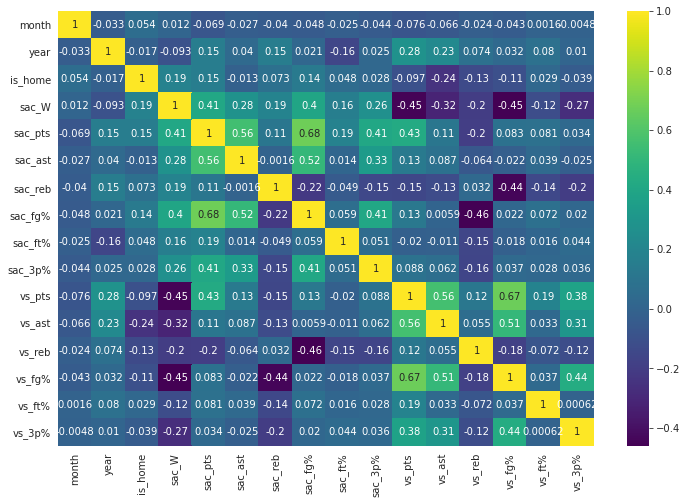

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(sac_games.corr(), annot=True, cmap='viridis')

In [27]:
sac_games.corr()['sac_W'].sort_values(ascending=False)

sac_W      1.000000
sac_pts    0.408923
sac_fg%    0.397455
sac_ast    0.284622
sac_3p%    0.264345
sac_reb    0.193043
is_home    0.187268
sac_ft%    0.158060
month      0.011952
year      -0.092923
vs_ft%    -0.119870
vs_reb    -0.202105
vs_3p%    -0.267732
vs_ast    -0.316313
vs_pts    -0.446718
vs_fg%    -0.454719
Name: sac_W, dtype: float64

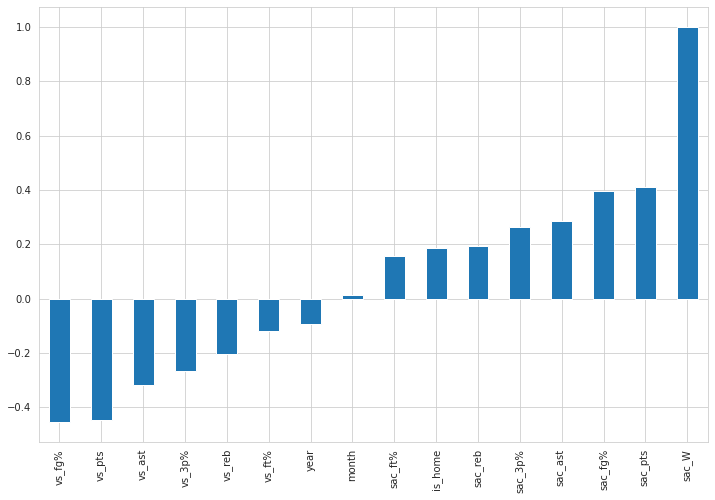

In [28]:
plt.figure(figsize=(12,8))
sac_games.corr()['sac_W'].sort_values().plot(kind='bar')

We see that the most correlation of statistics that constitutes a Kings win is points, fg%, ast, 3p%, rebounds, which makes sense.
The more points, the more accurate they shoot, the more passes the team has, the more it has to do with correlation.

So the analysis here should be that the Kings should focus on Team Basketball instead of individuality. 
If the Kings can move the ball around more, get shooters good shots and pass the ball, they should get more wins. [](http://)

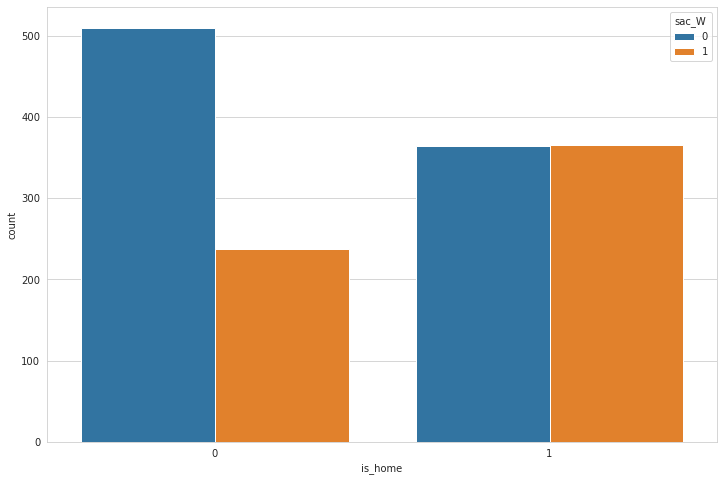

In [29]:
# Count Plot
plt.figure(figsize=(12,8))
sns.countplot(x=sac_games['is_home'], hue=sac_games["sac_W"])

It doesn't look like home court advantage has anything to do with the Kings taking wins, 
although they lose way more often on the road. Just doesn't seem like it's a good time to be a Kings fan when they're on the road.

Text(0.5, 1.0, 'Distribution plot of Kings total PPG')

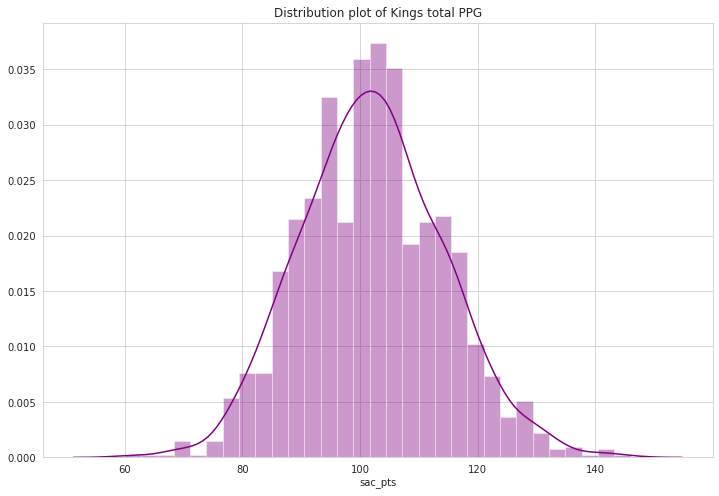

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_pts'],color="Purple")

plt.title("Distribution plot of Kings total PPG")

Text(0.5, 1.0, 'Distribution plot of Kings total AST')

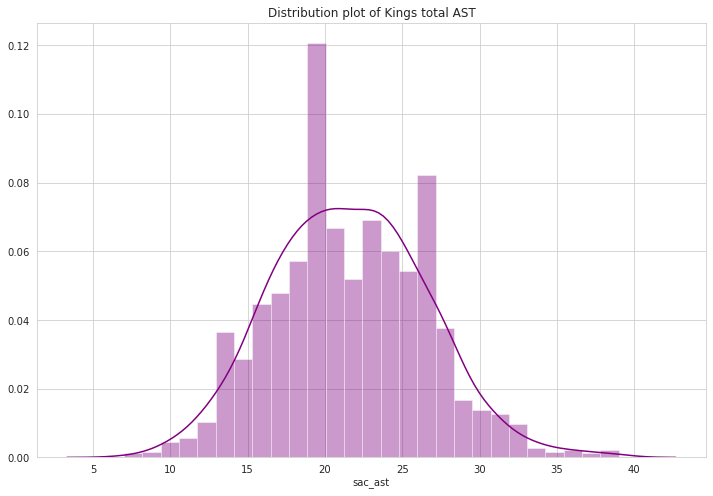

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_ast'],color="Purple")

plt.title("Distribution plot of Kings total AST")

It seems like the Kings have an anomaly to get 19 and 27 assists per game most often. Let's take a look to see their wins during that time.

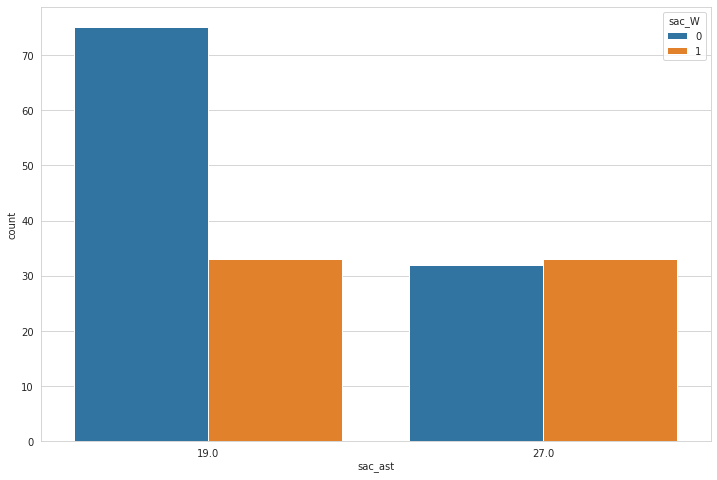

In [32]:
most_ast = sac_games[(sac_games['sac_ast'] == 19) | (sac_games['sac_ast'] == 27)]

# Count Plot
plt.figure(figsize=(12,8))
sns.countplot(x=most_ast['sac_ast'], hue=most_ast["sac_W"])

Analysis: It doesnt' look like there's any difference during these times. Looks like the trend with the correlation that we saw earlier was true,
The more the Kings get assists, the more wins that they get. At 19 assists per game it looks like they lose about ~70% of the time, so keep passing Sacramento!

Text(0.5, 1.0, 'Distribution plot of Kings total REB')

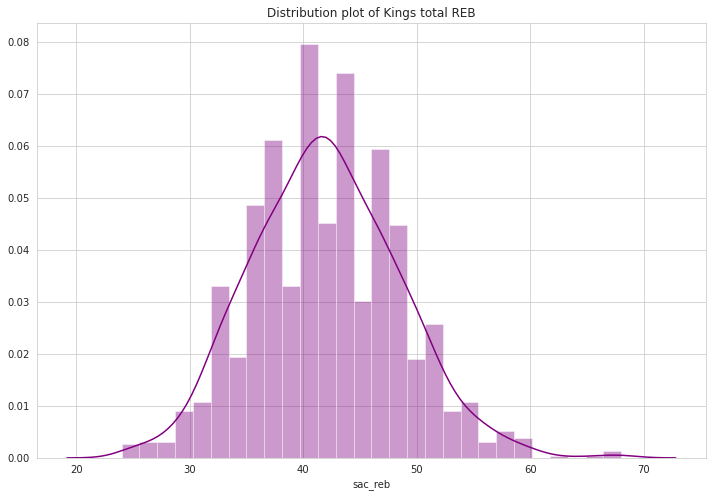

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_reb'],color="Purple")

plt.title("Distribution plot of Kings total REB")

Text(0.5, 1.0, 'Distribution plot of Kings total FG% Per Game')

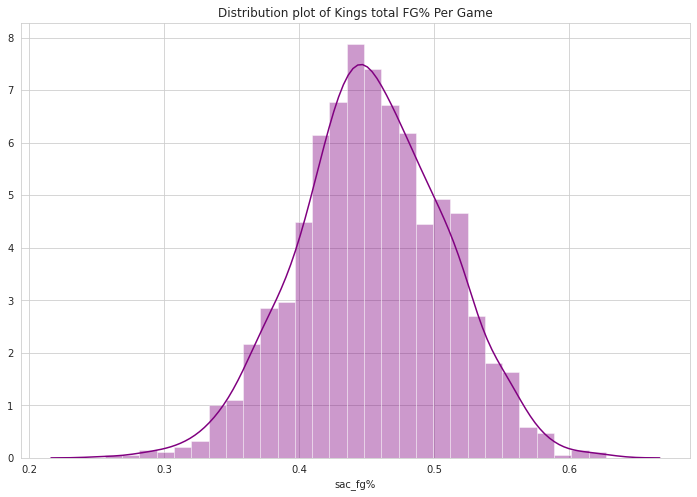

In [34]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_fg%'],color="Purple")

plt.title("Distribution plot of Kings total FG% Per Game")

Text(0.5, 1.0, 'Distribution plot of Kings total FT% Per Game')

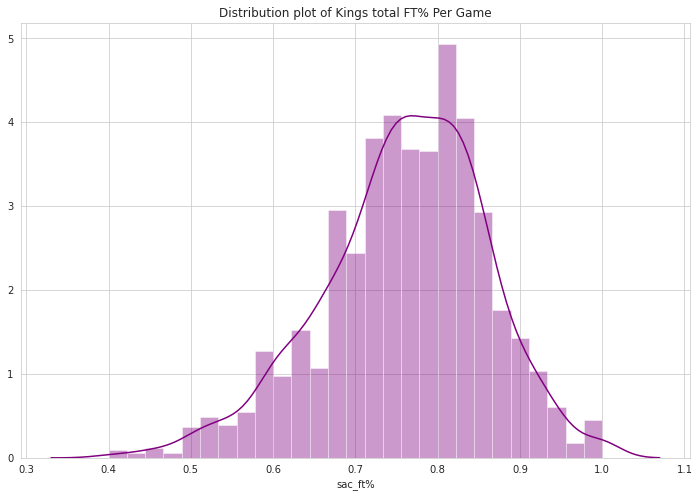

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_ft%'],color="Purple")

plt.title("Distribution plot of Kings total FT% Per Game")

Text(0.5, 1.0, 'Distribution plot of Kings total 3P% Per Game')

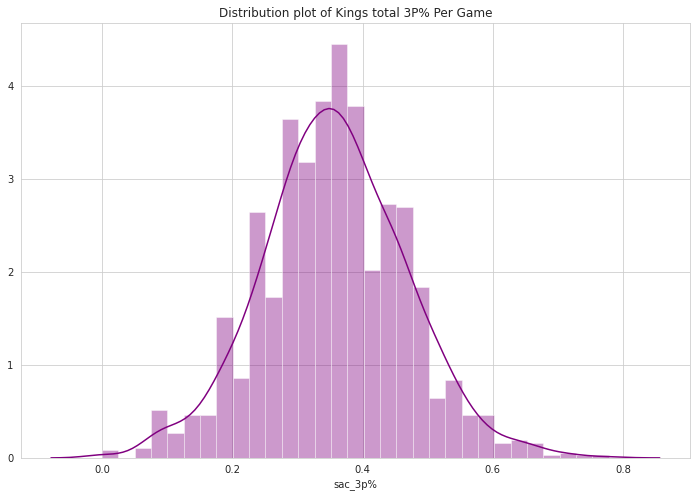

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(sac_games['sac_3p%'],color="Purple")

plt.title("Distribution plot of Kings total 3P% Per Game")

In [37]:
We can simplify this by using a subplot to make it cleaner.

SyntaxError: invalid syntax (<ipython-input-37-154865152413>, line 1)

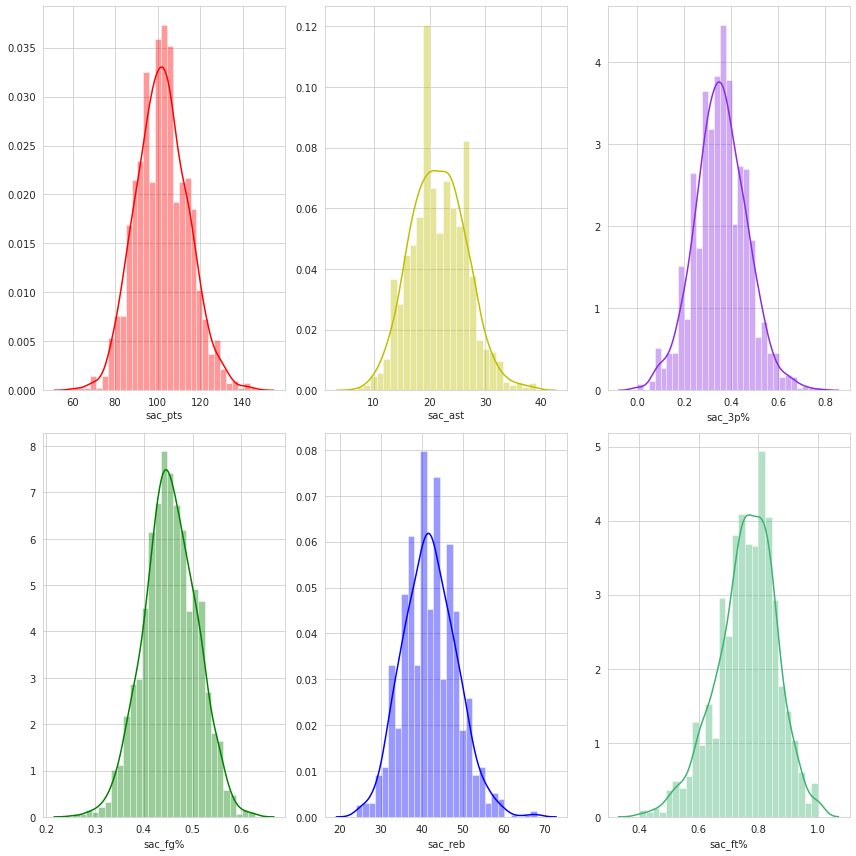

In [38]:
f, axes = plt.subplots(2, 3, figsize=(12, 12))

sns.distplot(sac_games['sac_pts'], ax=axes[0, 0], color='r')
sns.distplot(sac_games['sac_ast'], ax=axes[0, 1], color='y')
sns.distplot(sac_games['sac_reb'], ax=axes[1, 1], color='b')
sns.distplot(sac_games['sac_fg%'], ax=axes[1, 0], color='g')
sns.distplot(sac_games['sac_3p%'], ax=axes[0, 2], color='blueviolet')
sns.distplot(sac_games['sac_ft%'], ax=axes[1, 2], color='mediumseagreen')

plt.tight_layout()

# More Data Analysis

Although this section might be verbose, I think it's important to showcase all of the necessary data to get a wide view of what the Kings are all about.
Before we go into our Machine Learning models, let's continue to explore our opponent's data.



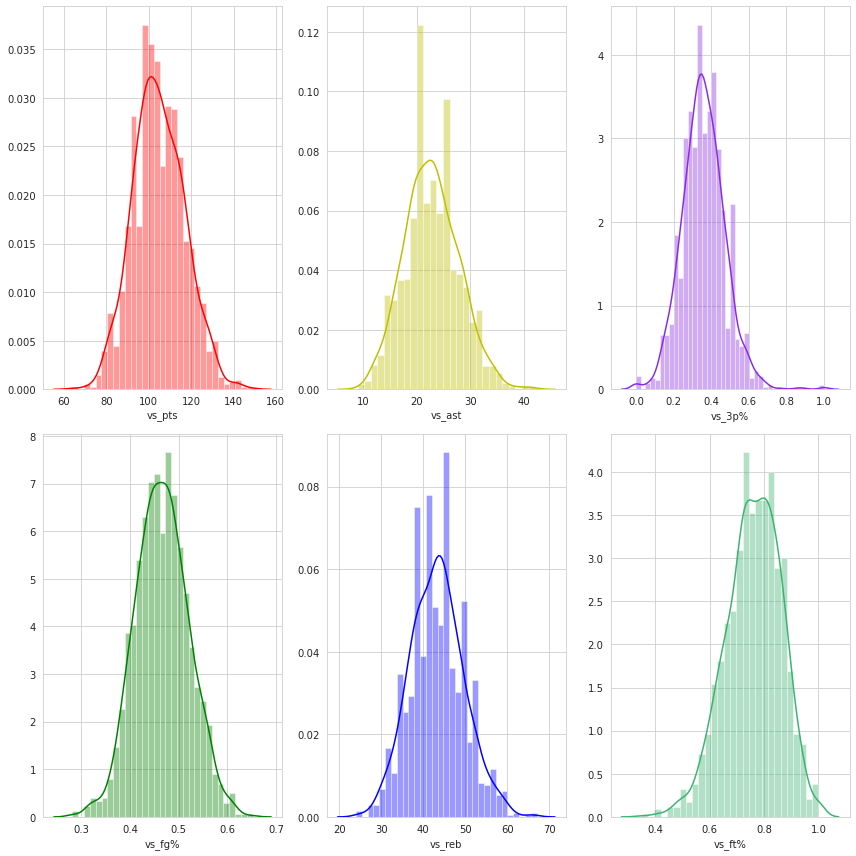

In [39]:
f, axes = plt.subplots(2, 3, figsize=(12, 12))

sns.distplot(sac_games['vs_pts'], ax=axes[0, 0], color='r')
sns.distplot(sac_games['vs_ast'], ax=axes[0, 1], color='y')
sns.distplot(sac_games['vs_reb'], ax=axes[1, 1], color='b')
sns.distplot(sac_games['vs_fg%'], ax=axes[1, 0], color='g')
sns.distplot(sac_games['vs_3p%'], ax=axes[0, 2], color='blueviolet')
sns.distplot(sac_games['vs_ft%'], ax=axes[1, 2], color='mediumseagreen')

plt.tight_layout()


### Comparison between Wins vs Losses Data

Let's take a look at comparing these graphs together to get a better idea how the Kings stats add up when Kings Win vs they Lose.

Text(0.5, 1.0, 'FG% Comparison when Kings WL')

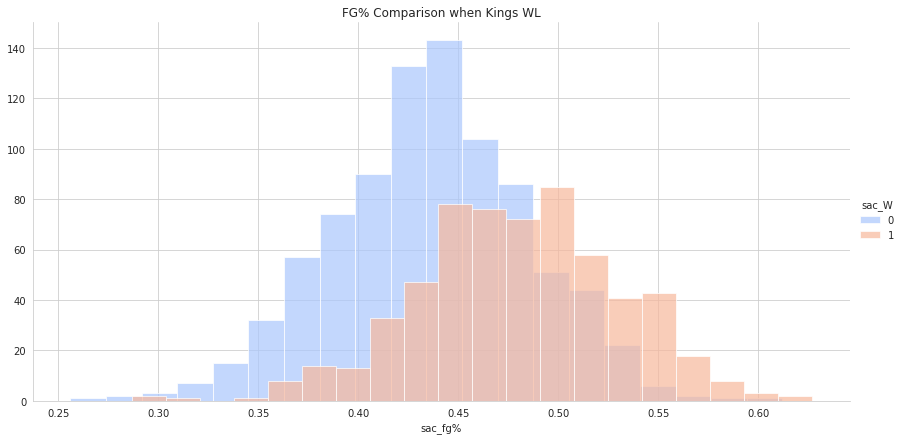

In [40]:
g = sns.FacetGrid(sac_games,hue="sac_W",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'sac_fg%',bins=20,alpha=0.7)
g.add_legend()

plt.title("FG% Comparison when Kings WL")

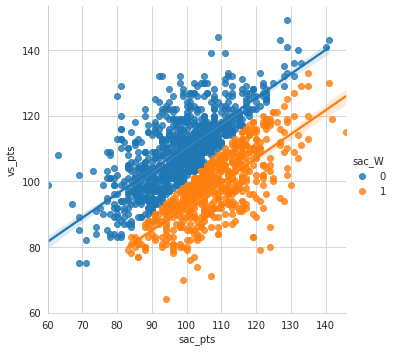

In [41]:
sns.lmplot('sac_pts','vs_pts',data=sac_games,hue='sac_W')

Interestingly, it looks like the Kings score less points when they win, that should mean that their defense is pretty good when they win, but horrible when they lose.
You can see that Sacramento's opponents score a ton of points against them when they lose. 

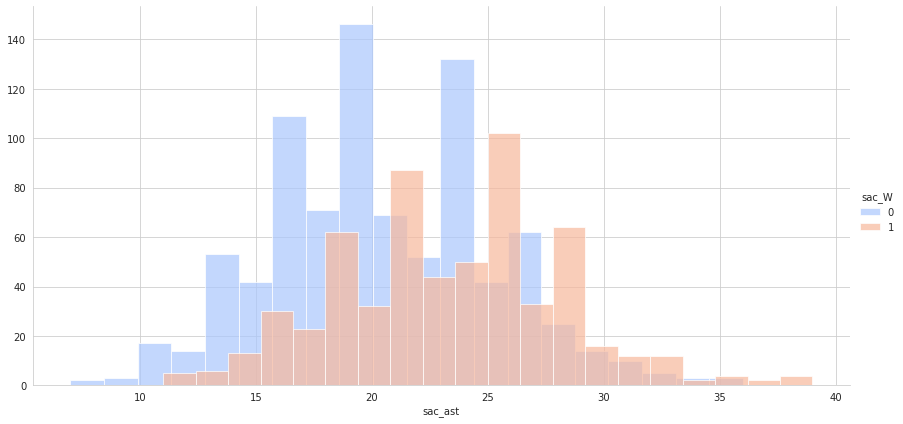

In [42]:
g = sns.FacetGrid(sac_games,hue="sac_W",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'sac_ast',bins=20,alpha=0.7)
g.add_legend()

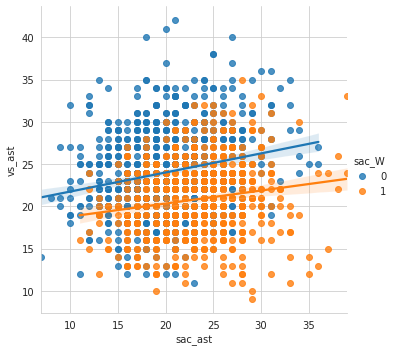

In [43]:
sns.lmplot('sac_ast','vs_ast',data=sac_games,hue='sac_W')

Not a very clear cut pattern for assists. But it does look like the higher the Kings assists, the more wins that they do have.

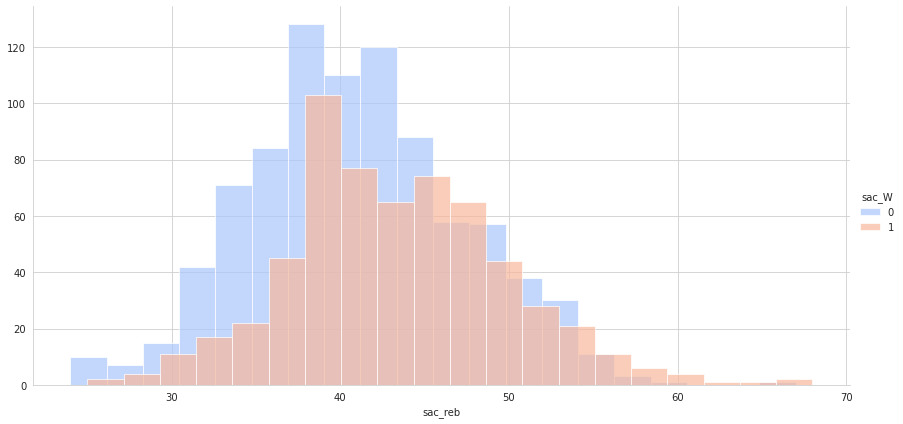

In [44]:
g = sns.FacetGrid(sac_games,hue="sac_W",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'sac_reb',bins=20,alpha=0.7)
g.add_legend()

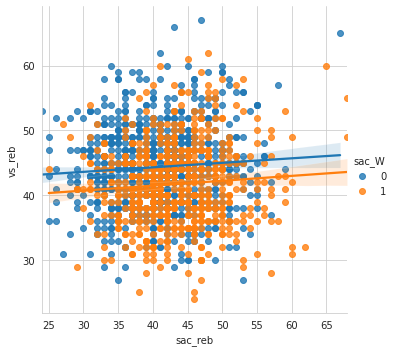

In [45]:
sns.lmplot(x='sac_reb',y='vs_reb',data=sac_games,hue='sac_W')

Same story with assists and rebounds, no direct pattern here.

# Machine Learning (Predicting Points Per Game)

Now let's get to it. We have thus far took a look at the NBA Teams and cleaned the data.

## Cleaned Data
* Deleted unnecessary columns
* Modified the date_time 
* Changed data to match with Kings vs Opponents vs Home and Away
* Added new columns to determine whether or not Kings are Home vs Away

After we cleaned the data, we took a look to see what the data tells us:

## Exploratory Data Analysis
* The Kings have a high correlation with assists, points, fg%, 3p% all around which tells us that the more the team scores, passes, and plays like a team, the more wins they get.
* We have seen odd trends about averaging a high assist of 19 and 27 ppg, but after further analysis, this is pure coincidence and doesn't have anything to do with Wins vs Losses
* Took a look and compared Kings' Stats vs Kings' Opponent stats in depth
* Took a look and compared Kings' Stats when they Win vs when they Lose

# Regression Analysis

Since we are going to predict a range (continuous) of points, we will be utilizing a few Machine Learning Models at a very base level including:
* Linear Regression
* Decision Tree Regressor
* XGBoost Regressor
* Catboost Regressor
* Adaboost Regressor

## Preparing our Training and Testing Data

Before we can attempt to do any Regression Analysis on our Models, we have to first prepare our training and testing data.
This is standard protocol for any Machine Learning algorithms, so let's get to it!

In [46]:
sac_games.head()

,date,month,year,is_home,vs,sac_W,sac_pts,sac_ast,sac_reb,sac_fg%,sac_ft%,sac_3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,2020-03-01,3,2020,1,DET,1,106.0,18.0,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,2020-02-28,2,2020,0,MEM,1,104.0,24.0,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,2020-02-27,2,2020,0,OKC,0,108.0,30.0,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,2020-02-25,2,2020,0,GSW,1,112.0,25.0,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,2020-02-22,2,2020,0,LAC,1,112.0,25.0,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333


In [47]:
X = sac_games.drop(['sac_pts', 'date', 'month', 'year', 'vs'],1)
y = sac_games['sac_pts']

In [48]:
X

,is_home,sac_W,sac_ast,sac_reb,sac_fg%,sac_ft%,sac_3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,1,1,18.0,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,0,1,24.0,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,0,0,30.0,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,0,1,25.0,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,0,1,25.0,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23120,0,0,19.0,39.0,0.507,0.778,0.125,106.0,24.0,36.0,0.468,0.889,0.308
23144,0,0,21.0,37.0,0.459,0.722,0.419,129.0,30.0,46.0,0.512,0.861,0.480
23158,1,0,17.0,43.0,0.425,0.611,0.385,97.0,21.0,44.0,0.444,0.600,0.350
23187,1,1,20.0,42.0,0.552,0.700,0.364,106.0,24.0,32.0,0.488,0.500,0.417


In [49]:
y

4        106.0
19       104.0
27       108.0
44       112.0
60       112.0
         ...  
23120     99.0
23144    117.0
23158     95.0
23187    113.0
23193     94.0
Name: sac_pts, Length: 1477, dtype: float64

In [50]:
# Train our model using X,y we just created
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Linear Regression

In [51]:
# Linear Regression (Estimate how many ppg the Kings have)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
# Increase in val means increase/decrease in "col" 
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
round(coeff_df, 2)

-38.41643565198463


,Coefficient
is_home,1.15
sac_W,8.47
sac_ast,0.38
sac_reb,0.40
sac_fg%,86.70
sac_ft%,15.63
sac_3p%,10.50
vs_pts,0.61
vs_ast,-0.20
vs_reb,0.03


## Interpreting the **Kings** coefficients:

* Holding all other features fixed, if the Kings are playing at home, they score 1.3 more points per game.
* Holding all other features fixed, if the Kings win the game, they score 8.47 more points per game.
* Holding all other features fixed, for every assist the Kings make, that translates into an increase of 0.38 points per game.
* Holding all other features fixed, for every rebound the Kings make, that translates into an increase of 0.4 points per game.
* Holding all other features fixed, for an increase in FG%, that translates into an increase of 8.67 points per game.
* Holding all other features fixed, for an increase in FT%, that translates into an increase of 1.5 points per game.
* Holding all other features fixed, for an increase in 3P%, that translates into an increase of 1.1 points per game.


## Interpreting the **Opponents** coefficients:

* Holding all other features fixed, for every point the opponents make, that translates into an increase of 0.61 points per game.
* Holding all other features fixed, for every assist the opponents make, that translates into an decrease of 0.20 points per game.
* Holding all other features fixed, for every rebound the opponents make, that translates into an increase of 0.03 points per game.
* Holding all other features fixed, for an increase in opponent FG%, that translates into an decrease of 0.02 points per game.
* Holding all other features fixed, for an increase in opponent FT%, that translates into an decrease of 0.004 points per game.
* Holding all other features fixed, for an increase in opponent 3P%, that translates into an decrease of 0.04 points per game.

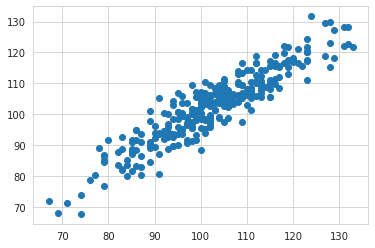

In [53]:
# Predictions
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

We can see that there is a linear correlation that we can see, although not perfect we can see it there.

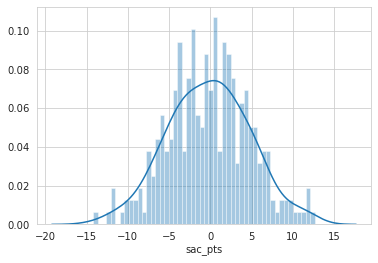

In [54]:
sns.distplot((y_test-predictions),bins=50);

In [55]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Linear Regression MAE:', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('Linear Regression MSE:', round(metrics.mean_squared_error(y_test, predictions), 2))
print('Linear Regression RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))
print('Linear Regression R2:', round(r2_score(y_test, predictions), 2))

Linear Regression MAE: 3.97
Linear Regression MSE: 24.34
Linear Regression RMSE: 4.93
Linear Regression R2: 0.85


# Decision Tree Regressor for PPG

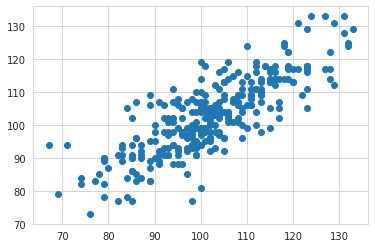

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=1000).fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
plt.scatter(y_test,dtree_predict)

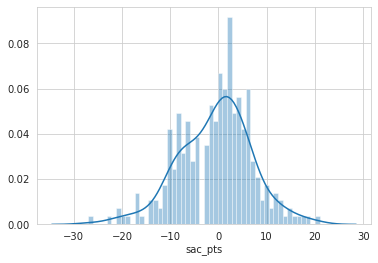

In [57]:
sns.distplot((y_test-dtree_predict),bins=50);

In [58]:
print('Decision Tree MAE:', round(metrics.mean_absolute_error(y_test, dtree_predict), 2))
print('Decision Tree MSE:', round(metrics.mean_squared_error(y_test, dtree_predict), 2))
print('Decision Tree RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, dtree_predict)), 2))
print('Decision Tree R2:', round(r2_score(y_test, dtree_predict), 2))

Decision Tree MAE: 5.84
Decision Tree MSE: 57.39
Decision Tree RMSE: 7.58
Decision Tree R2: 0.64


### Analysis

It doesn't look like the Decision Tree Regressor is the way to go. Our Linear Regression was a lot more accurate than our Decision Tree.
Let's take a look at a couple of other Machine Learning Models.

Let's see if we can improve this using a Random Forest Regressor

## Random Forest Regressor for PPG

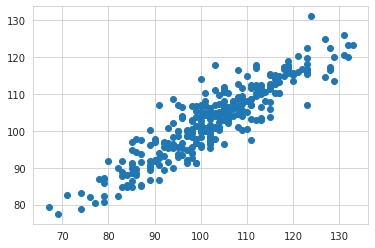

In [59]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, max_depth=100)
regressor.fit(X_train, y_train)

regressor_predict = regressor.predict(X_test)

# Graph Random Forest
plt.scatter(y_test,regressor_predict)

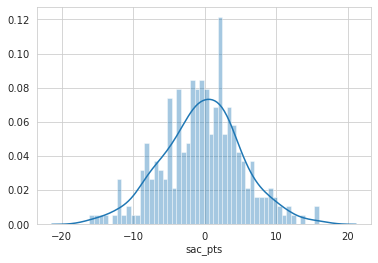

In [60]:
sns.distplot((y_test-regressor_predict),bins=50);

In [61]:
print('Random Forest MAE:', round(metrics.mean_absolute_error(y_test, regressor_predict), 2))
print('Random Forest MSE:', round(metrics.mean_squared_error(y_test, regressor_predict), 2))
print('Random Forest RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, regressor_predict)), 2))
print('Random Forest R2:', round(r2_score(y_test, regressor_predict), 2))

Random Forest MAE: 4.36
Random Forest MSE: 30.99
Random Forest RMSE: 5.57
Random Forest R2: 0.81


## Analysis

As you can see, Our scores in general all go down and r2 improved from Decision Tree. It's a good idea to use Random Forest Regressor instead of Decision Trees.

# XGBoost Regressor

In [62]:
import xgboost as xgb
from sklearn.metrics import r2_score, auc

In [63]:
xgb_model = xgb.XGBRegressor(max_depth=50)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

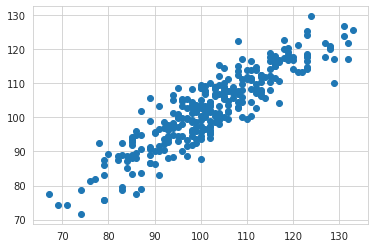

In [64]:
plt.scatter(y_test,xgb_pred)

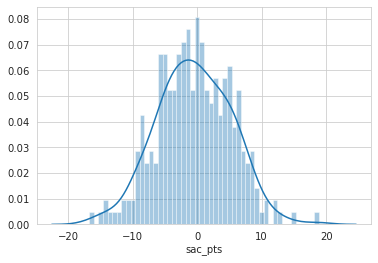

In [65]:
sns.distplot((y_test-xgb_pred),bins=50);

In [66]:
print('XGB MAE:', round(metrics.mean_absolute_error(y_test, xgb_pred), 2))
print('XGB MSE:', round(metrics.mean_squared_error(y_test, xgb_pred), 2))
print('XGB RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)), 2))
print('XGB R2:', round(r2_score(y_test, xgb_pred), 2))

XGB MAE: 4.61
XGB MSE: 32.71
XGB RMSE: 5.72
XGB R2: 0.8


## Analysis

Hmm, seems like XGB Regressor is a little bit worse than Random Forest Regressor and even Linear Regression here.
This might be a pattern that we see.

# Catboost Regressor

In [67]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=10, 
    learning_rate=.3,
    depth=10
)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

0:	learn: 10.2644110	total: 91.9ms	remaining: 827ms
1:	learn: 8.8959522	total: 103ms	remaining: 413ms
2:	learn: 7.9188187	total: 114ms	remaining: 267ms
3:	learn: 7.1405307	total: 126ms	remaining: 190ms
4:	learn: 6.6187775	total: 139ms	remaining: 139ms
5:	learn: 6.1215973	total: 150ms	remaining: 99.9ms
6:	learn: 5.6854782	total: 161ms	remaining: 68.9ms
7:	learn: 5.3938023	total: 164ms	remaining: 41.1ms
8:	learn: 5.1631952	total: 176ms	remaining: 19.6ms
9:	learn: 4.9380204	total: 188ms	remaining: 0us


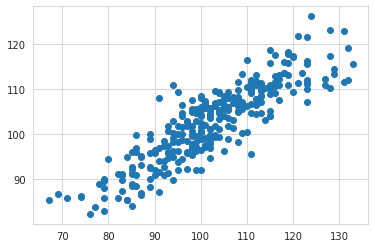

In [68]:
plt.scatter(y_test,cat_pred)

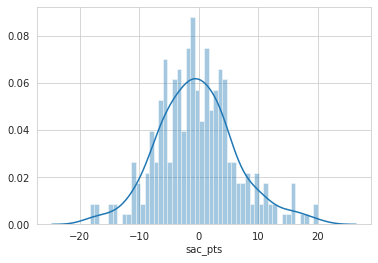

In [69]:
sns.distplot((y_test-cat_pred),bins=50);

In [70]:
print('Cat MAE:', round(metrics.mean_absolute_error(y_test, cat_pred),2 ))
print('Cat MSE:', round(metrics.mean_squared_error(y_test, cat_pred),2 ))
print('Cat RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, cat_pred)),2 ))
print('Cat R2:', round(r2_score(y_test, cat_pred), 2) )

Cat MAE: 5.15
Cat MSE: 44.27
Cat RMSE: 6.65
Cat R2: 0.72


## Analysis

Catboost isn't even performing better than Linear Regression! It looks like our best bet thus far is Random Forest Regressor for now.

# AdaBoost Regressor

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

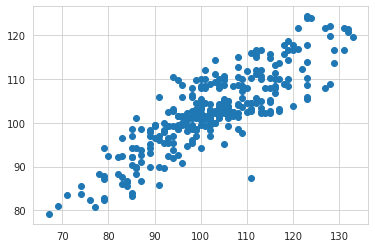

In [72]:
plt.scatter(y_test,ada_pred)

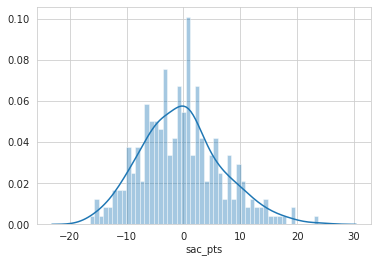

In [73]:
sns.distplot((y_test-ada_pred),bins=50);

In [74]:
print('Ada MAE:', round(metrics.mean_absolute_error(y_test, ada_pred),2 ))
print('Ada MSE:', round(metrics.mean_squared_error(y_test, ada_pred),2 ))
print('Ada RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, ada_pred)),2 ))
print('Ada R2:', round(r2_score(y_test, ada_pred), 2) )

Ada MAE: 5.55
Ada MSE: 49.85
Ada RMSE: 7.06
Ada R2: 0.69


## Conclusion 

It looks like our winner is Linear Regression with a R2 Score of 82% with Random Forest Regressor coming at a close 2nd.

Because this is predicting points per game, it seems like a simple problem should be solved by a simple equation.
However, there is a number of features that we have made which does make it surprising for the other regressor algorithms to not even come close to these.

What I would use is actually the **Random Forest Regressor** and trying to change the hyperparameters to make the data as close as it needs to be.

# Predicting Wins and Losses (Classification Analysis)

For our second Machine Learning Model, let's go ahead and try and predict the Kings Win vs Losses. 
This is a classification machine learning problem.

Here are the few classification algorithms that we will use:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* SVC with Grid Search Classifier

In [75]:
# We need to drop the non-important values and prepare the values for only 1s and 0s
X = sac_games.drop(['sac_W', 'date', 'month', 'year', 'vs'],1)
y = sac_games['sac_W']

In [76]:
# Retrain the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

Before we analyze our data, we need to scale it first.
We'll be using a Standard Scaler fomr `sklearn.preprocessing`

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [78]:
# Logistic Regression (0 OR 1: Predict if the Kings won or lost)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)

# Predictions
log_pred = logmodel.predict(scaled_X_test)

# Evaluation
print(classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       289
           1       0.99      0.98      0.99       199

    accuracy                           0.99       488
   macro avg       0.99      0.99      0.99       488
weighted avg       0.99      0.99      0.99       488

[[287   2]
 [  3 196]]


## Analysis

Not bad, we only have a total of 5 errors throughout our data only using a basic Logistic Regression.
But let's try and see if we can do better and just explore other Machine Learning Models.

## Decision Tree Classifier

In [79]:
# Decision Tree (0 or 1: Determine if a person is PRESENT or ABSENT from class)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(classification_report(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       289
           1       0.94      0.94      0.94       199

    accuracy                           0.95       488
   macro avg       0.95      0.95      0.95       488
weighted avg       0.95      0.95      0.95       488

[[278  11]
 [ 12 187]]


## Random Forest Classifier

In [80]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       289
           1       0.92      0.87      0.89       199

    accuracy                           0.92       488
   macro avg       0.92      0.91      0.91       488
weighted avg       0.92      0.92      0.92       488

[[273  16]
 [ 25 174]]


## SVC w/ Grid Search

In [81]:
# SVC
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_model_pred = svc_model.predict(X_test)

# Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.5s finished


In [82]:
print(classification_report(y_test,svc_model_pred))
print(confusion_matrix(y_test,svc_model_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       289
           1       0.99      0.97      0.98       199

    accuracy                           0.99       488
   macro avg       0.99      0.99      0.99       488
weighted avg       0.99      0.99      0.99       488

[[288   1]
 [  5 194]]


In [83]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       199

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488

[[289   0]
 [  0 199]]


# Deep Learning

In [84]:
# Let's set our data
X = sac_games.drop(['sac_pts', 'date', 'month', 'year', 'vs'],1)
y = sac_games['sac_pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [85]:
# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train)

features_validation= np.array(X_val)
targets_validation = np.array(y_val)

features_test= np.array(X_test)
targets_test = np.array(y_test)

In [86]:
print(features.shape)
print(targets.shape)

print(features_validation.shape)
print(targets_validation.shape)

print(features_test.shape)
print(targets_test.shape)

(944, 13)
(944,)
(237, 13)
(237,)
(296, 13)
(296,)


In [87]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Building the model
model = Sequential() 
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 29,251
Trainable params: 29,251
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 5000
944/944 [==============================] - 0s 47us/step
Training MSE: 51.26214599609375
237/237 [==============================] - 0s 29us/step
Validation MSE: 53.900794982910156 

Step :  10 / 5000
944/944 [==============================] - 0s 24us/step
Training MSE: 39.385459899902344
237/237 [==============================] - 0s 31us/step
Validation MSE: 41.19546127319336 

Step :  20 / 5000
944/944 [==============================] - 0s 24us/step
Training MSE: 37.262752532958984
237/237 [==============================] - 0s 31us/step
Validation MSE: 38.058712005615234 

Step :  30 / 5000
944/944 [==============================] - 0s 24us/step
Training MSE: 34.126182556152344
237/237 [==============================] - 0s 29us/step
Validation MSE: 34.947994232177734 

Step :  40 / 5000
944/944 [==============================] - 0s 24us/step
Training MSE: 33.796146392822266
237/237 [==============================] - 0s 28us/step
Validation MSE: 34.37709426879883 

Step

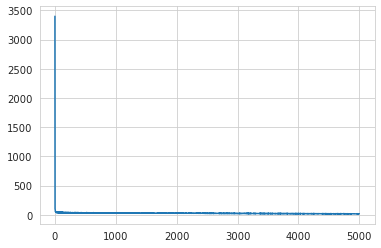

In [88]:
# Training the model
epochs_tot = 5000
epochs_step = 10
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=10, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mse'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [89]:
#prediction and error checking
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',round(r2_score(y_val, predictions), 2))
print('MSE score = ',round(mean_squared_error(y_val, predictions), 2))

R2 score =  0.75
MSE score =  38.94


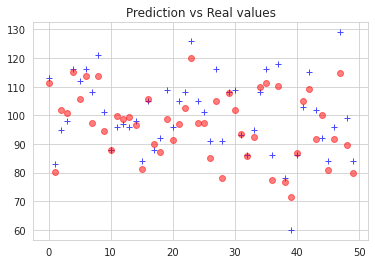

In [90]:
plt.plot(y_val.reset_index()['sac_pts'][0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [91]:
#prediction and error checking
predictions = model.predict(features_test, verbose=0)

print('R2 score = ',round(r2_score(y_test, predictions), 2))
print('MSE score = ',round(mean_squared_error(y_test, predictions), 2))

R2 score =  0.74
MSE score =  44.65


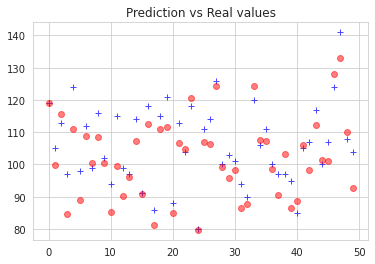

In [92]:
plt.plot(y_test.reset_index()['sac_pts'][0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()